In [2]:
# importing the dependencies
import numpy as np
import pandas as pd

In [3]:
# SVM from scratch 
class  ScratchSVMClassifier():
    def __init__(self, num_iter, lr, kernel= 'linear' , threshold = 1e-5 , verbose = False):
        self.iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.kernel = kernel
        self.val_loss = np.zeros(self.iter)
        self.threshold = threshold
    
    def _kernel(self,X1,X2):
        if self.kernel == 'linear':
            return np.dot(X1,X2.T)
        else:
            # polynomial kernel
            return (1*np.dot(X1,X2.T)+1)**2
    
    def fit(self, X, y, X_val=None, y_val=None):
        
        # creating lamda from random data
        self.lamda_1 = np.random.rand(len(X))

        # Lagrange descent
        for i in range(self.iter):
            
            # updating lamda on each iteration
            for i_x in range(len(X)):
                counter = 0
                for id_x in range(len(X)):
                    counter += self.lamda_1[id_x]*y[i_x]*y[id_x]*self._kernel(X[i_x],X[id_x])

                self.lamda_1[i_x] += self.lr*(1-counter)

                if self.lamda_1[i_x] < 0:
                    self.lamda_1[i_x] = 0
            
            # getting the support vectors
            self.X_supportvectors = X[self.lamda_1 > self.threshold]
            self.y_supportvectors = y[self.lamda_1 > self.threshold]
            self.lamda_supportvectors = self.lamda_1[self.lamda_1 > self.threshold]
                    
    def predict(self, X):
        
        y_pred = np.zeros(len(X))
        
        # predicting using the support vectors
        for i in range(len(X)):
            counter_sv = 0
            for sv in range(len(self.X_supportvectors)):
                counter_sv += self.lamda_supportvectors[sv]*self.y_supportvectors[sv]*self._kernel(X[i],self.X_supportvectors[sv])
            if counter_sv >= 0:
                y_pred[i] = 1
            else:
                y_pred[i] = 0
                
        return y_pred

In [34]:
# importing datasets
from sklearn import datasets

X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

In [35]:
# splitting the data into learning and estimation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [36]:
# doing the estimation
clf = ScratchSVMClassifier(num_iter=500, lr=0.01, verbose=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.7
precision 0.7
recall 0.7
f1 0.7


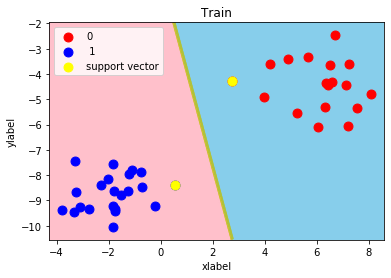

In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    # displaying the support vectors
    plt.scatter(model.X_supportvectors[:,0],model.X_supportvectors[:,1],color='yellow',s=80,label='support vector')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_train,y_train,clf,title='Train',target_names=['0', ' 1'])

In [40]:
clf = ScratchSVMClassifier(num_iter=500, lr=0.01, kernel= 'polynomial',verbose=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1., 1., 1., 1., 0., 0., 0., 1., 1., 1.])